# 美国2012年总统候选人政治献金数据分析

导入包

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline
import os

方便大家操作，将月份和参选人以及所在政党进行定义

In [4]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

读取文件

In [5]:
usa = pd.read_csv('../data/usa_election.txt')
usa.head()

c:\python\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


查看文件样式以及基本信息

In [6]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536041 entries, 0 to 536040
Data columns (total 16 columns):
cmte_id              536041 non-null object
cand_id              536041 non-null object
cand_nm              536041 non-null object
contbr_nm            536041 non-null object
contbr_city          536026 non-null object
contbr_st            536040 non-null object
contbr_zip           535973 non-null object
contbr_employer      525088 non-null object
contbr_occupation    530520 non-null object
contb_receipt_amt    536041 non-null float64
contb_receipt_dt     536041 non-null object
receipt_desc         8479 non-null object
memo_cd              49718 non-null object
memo_text            52740 non-null object
form_tp              536041 non-null object
file_num             536041 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 65.4+ MB


【知识点】使用map函数+字典，新建一列各个候选人所在党派party

In [7]:
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }
usa['party'] = usa['cand_nm'].map(parties)

查看单独一行，是否加上了'party'一列

In [8]:
usa.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


使用np.unique()函数查看colums：party这一列中有哪些元素

In [9]:
usa['party'].unique()

array(['Republican', 'Democrat', 'Reform', 'Libertarian'], dtype=object)

使用value_counts()函数，统计party列中各个元素出现次数

In [10]:
usa['party'].value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

【知识点】使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [11]:
usa.groupby(by='party')[['contb_receipt_amt']].sum()

,contb_receipt_amt
party,
Democrat,8.105758e+07
Libertarian,4.132769e+05
Reform,3.390338e+05
Republican,1.192255e+08


查看具体每天各个党派收到的政治献金总数contb_receipt_amt  
使用groupby([多个分组参数])

In [12]:
usa.groupby(by=['party', 'contb_receipt_dt'])[['contb_receipt_amt']].sum()

contb_receipt_amt
party      contb_receipt_dt                   
Democrat   01-AUG-11                 175281.00
           01-DEC-11                 651532.82
           01-JAN-12                  58098.80
           01-JUL-11                 165961.00
           01-JUN-11                 145459.00
...                                        ...
Republican 31-JAN-12                 869890.41
           31-JUL-11                  12781.02
           31-MAR-11                  62475.00
           31-MAY-11                 301339.80
           31-OCT-11                 734601.83

[1183 rows x 1 columns]

查看日期格式，并将其转换为Pandas的日期格式,通过函数加map方式进行转换

In [13]:
usa.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
party                 object
dtype: object

查看是否转换成功

In [14]:
usa['contb_receipt_dt'] = pd.to_datetime(usa['contb_receipt_dt'])
usa.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,2011-06-20,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,2011-06-23,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-07-05,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,2011-08-01,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,2011-06-20,NaN,NaN,NaN,SA17A,736166,Republican


In [15]:
usa.dtypes

cmte_id                      object
cand_id                      object
cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_st                    object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
receipt_desc                 object
memo_cd                      object
memo_text                    object
form_tp                      object
file_num                      int64
party                        object
dtype: object

将时间转换为时间数据类型  
根据时间进行排序

In [16]:
re = usa.groupby(by=['party', 'contb_receipt_dt'])[['contb_receipt_amt']].sum().sort_values(by='contb_receipt_dt')
re

contb_receipt_amt
party      contb_receipt_dt                   
Republican 2011-01-01                  8600.00
           2011-01-03                  4800.00
           2011-01-04                  5000.00
           2011-01-12                  4150.00
           2011-01-13                  4000.00
...                                        ...
Democrat   2012-01-30                435921.72
Republican 2012-01-30                255204.80
Reform     2012-01-31                   150.00
Democrat   2012-01-31               1418410.31
Republican 2012-01-31                869890.41

[1183 rows x 1 columns]

得到转换后的，每天各政党所收政治献金数目。  

考察知识点：groupby（多个字段）

【知识点】使用unstack()将上面所得数据中的party从一级索引变成列索引,unstack('party')

In [17]:
re.unstack(level=0, fill_value=0)

contb_receipt_amt                                
party                     Democrat Libertarian   Reform Republican
contb_receipt_dt                                                  
2011-01-01                    0.00         0.0     0.00    8600.00
2011-01-03                    0.00         0.0     0.00    4800.00
2011-01-04                    0.00         0.0     0.00    5000.00
2011-01-12                    0.00         0.0     0.00    4150.00
2011-01-13                    0.00         0.0     0.00    4000.00
...                            ...         ...      ...        ...
2012-01-27               305785.47         0.0  3176.37  368441.82
2012-01-28               235492.85         0.0   175.00   82775.80
2012-01-29                93177.00         0.0   200.00   75220.02
2012-01-30               435921.72         0.0   130.00  255204.80
2012-01-31              1418410.31         0.0   150.00  869890.41

[376 rows x 4 columns]

使用上面获取的数据  
画出各党派累计政治献金,cumsum()累加函数

In [18]:
#fill_value=0  别忘记fill_value=0 
cumsum = re.unstack(level=0, fill_value=0).cumsum()
cumsum.head()

contb_receipt_amt                              
party                     Democrat Libertarian Reform Republican
contb_receipt_dt                                                
2011-01-01                     0.0         0.0    0.0     8600.0
2011-01-03                     0.0         0.0    0.0    13400.0
2011-01-04                     0.0         0.0    0.0    18400.0
2011-01-12                     0.0         0.0    0.0    22550.0
2011-01-13                     0.0         0.0    0.0    26550.0

<Figure size 720x576 with 0 Axes>

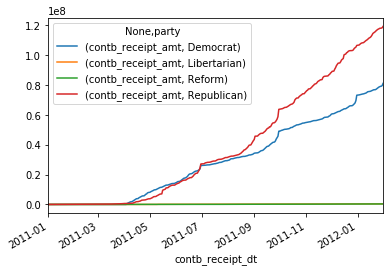

In [19]:
plt.figure(figsize=(10,8))
cumsum.plot()

把时间作为列，党派作为行来观察,unstack('contb_receipt')

In [30]:
re.unstack(level=0, fill_value=0).cumsum().stack().unstack(level=0)

contb_receipt_amt                                   \
contb_receipt_dt        2011-01-01 2011-01-03 2011-01-04 2011-01-12   
party                                                                 
Democrat                       0.0        0.0        0.0        0.0   
Libertarian                    0.0        0.0        0.0        0.0   
Reform                         0.0        0.0        0.0        0.0   
Republican                  8600.0    13400.0    18400.0    22550.0   

                                                                         \
contb_receipt_dt 2011-01-13 2011-01-14 2011-01-15 2011-01-16 2011-01-17   
party                                                                     
Democrat                0.0        0.0        0.0        0.0        0.0   
Libertarian             0.0        0.0        0.0        0.0        0.0   
Reform                  0.0        0.0        0.0        0.0        0.0   
Republican          26550.0    32550.0    33050.0    33800.0    34300.0   

                             ...                                            \
contb_receipt_dt 2011-01-18  ...    2012-01-22    2012-01-23    2012-01-24   
party                        ...                                             
Democrat                0.0  ...  7.688336e+07  7.722066e+07  7.767957e+07   
Libertarian             0.0  ...  4.132769e+05  4.132769e+05  4.132769e+05   
Reform                  0.0  ...  3.341704e+05  3.343954e+05  3.348954e+05   
Republican          39100.0  ...  1.157929e+08  1.164384e+08  1.169006e+08   

                                                                          \
contb_receipt_dt    2012-01-25    2012-01-26    2012-01-27    2012-01-28   
party                                                                      
Democrat          7.811852e+07  7.856879e+07  7.887458e+07  7.911007e+07   
Libertarian       4.132769e+05  4.132769e+05  4.132769e+05  4.132769e+05   
Reform            3.351774e+05  3.352024e+05  3.383788e+05  3.385538e+05   
Republican        1.173175e+08  1.175740e+08  1.179424e+08  1.180252e+08   

                                                            
contb_receipt_dt    2012-01-29    2012-01-30    2012-01-31  
party                                                       
Democrat          7.920325e+07  7.963917e+07  8.105758e+07  
Libertarian       4.132769e+05  4.132769e+05  4.132769e+05  
Reform            3.387538e+05  3.388838e+05  3.390338e+05  
Republican        1.181004e+08  1.183556e+08  1.192255e+08  

[4 rows x 376 columns]

使用stack()把party变成二级行索引,注意所有的值都不能为nan，需要填充为0

In [37]:
re.unstack(level=0, fill_value=0).cumsum().stack().unstack(level=0).unstack().unstack(level=1)

contb_receipt_dt               2011-01-01  2011-01-03  2011-01-04  2011-01-12  \
                  party                                                         
contb_receipt_amt Democrat            0.0         0.0         0.0         0.0   
                  Libertarian         0.0         0.0         0.0         0.0   
                  Reform              0.0         0.0         0.0         0.0   
                  Republican       8600.0     13400.0     18400.0     22550.0   

contb_receipt_dt               2011-01-13  2011-01-14  2011-01-15  2011-01-16  \
                  party                                                         
contb_receipt_amt Democrat            0.0         0.0         0.0         0.0   
                  Libertarian         0.0         0.0         0.0         0.0   
                  Reform              0.0         0.0         0.0         0.0   
                  Republican      26550.0     32550.0     33050.0     33800.0   

contb_receipt_dt               2011-01-17  2011-01-18  ...    2012-01-22  \
                  party                                ...                 
contb_receipt_amt Democrat            0.0         0.0  ...  7.688336e+07   
                  Libertarian         0.0         0.0  ...  4.132769e+05   
                  Reform              0.0         0.0  ...  3.341704e+05   
                  Republican      34300.0     39100.0  ...  1.157929e+08   

contb_receipt_dt                 2012-01-23    2012-01-24    2012-01-25  \
                  party                                                   
contb_receipt_amt Democrat     7.722066e+07  7.767957e+07  7.811852e+07   
                  Libertarian  4.132769e+05  4.132769e+05  4.132769e+05   
                  Reform       3.343954e+05  3.348954e+05  3.351774e+05   
                  Republican   1.164384e+08  1.169006e+08  1.173175e+08   

contb_receipt_dt                 2012-01-26    2012-01-27    2012-01-28  \
                  party                                                   
contb_receipt_amt Democrat     7.856879e+07  7.887458e+07  7.911007e+07   
                  Libertarian  4.132769e+05  4.132769e+05  4.132769e+05   
                  Reform       3.352024e+05  3.383788e+05  3.385538e+05   
                  Republican   1.175740e+08  1.179424e+08  1.180252e+08   

contb_receipt_dt                 2012-01-29    2012-01-30    2012-01-31  
                  party                                                  
contb_receipt_amt Democrat     7.920325e+07  7.963917e+07  8.105758e+07  
                  Libertarian  4.132769e+05  4.132769e+05  4.132769e+05  
                  Reform       3.387538e+05  3.388838e+05  3.390338e+05  
                  Republican   1.181004e+08  1.183556e+08  1.192255e+08  

[4 rows x 376 columns]

查看候选人姓名cand_nm和政治献金捐献者职业contbr_occupation，以及捐献情况。能看出各个候选人主要的支持者分布情况  
练习：groupy，sum()求和

In [20]:
usa.groupby(by=['cand_nm','contbr_occupation'])[['contb_receipt_amt']].sum()

contb_receipt_amt
cand_nm            contbr_occupation                                
Bachmann, Michelle 100% DISABLED VETERAN                     1869.50
                   100% DISABLED VIETNAM VETERAN              236.25
                   A/C AND HEAT                               250.00
                   ACADEMIC EMPLOYMENT SPECIALIST              25.00
                   ACCOUNT                                     50.00
...                                                              ...
Santorum, Rick     WRITER EDITOR                              250.00
                   WRITER/ACCOUNT EXEC                        500.00
                   WRITER/JOURNALIST                          250.00
                   WRITER/LAWYER                              300.00
                   YOUTH MINISTER                             250.00

[40161 rows x 1 columns]

找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额  

通过query("查询条件来查找捐献人职业")

In [22]:
usa.groupby(by=['cand_nm'])[['contb_receipt_amt']].max()

,contb_receipt_amt
cand_nm,
"Bachmann, Michelle",3022.00
"Cain, Herman",10000.00
"Gingrich, Newt",5100.00
"Huntsman, Jon",5000.00
"Johnson, Gary Earl",2500.00
"McCotter, Thaddeus G",4000.00
"Obama, Barack",1944042.43
"Paul, Ron",5000.00
"Pawlenty, Timothy",10000.00


In [24]:
usa.query('cand_nm=="Obama, Barack" & contb_receipt_amt==1944042.43')

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
176127,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1944042.43,2011-12-31,NaN,X,*,SA18,763233,Democrat


查看老兵主要支持谁：DISABLED VETERAN  
考察Series索引

In [27]:
cond = usa['contbr_occupation']=='DISABLED VETERAN'
cond

0         False
1         False
2         False
3         False
4         False
          ...  
536036    False
536037    False
536038    False
536039    False
536040    False
Name: contbr_occupation, Length: 536041, dtype: bool

In [29]:
ve = usa.loc[cond]
ve

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
149790,C00431445,P80003338,"Obama, Barack","MAHURIN, DAVID",TAMPA,FL,33616,VETERANS ADMINISTRATION,DISABLED VETERAN,10.00,2012-01-17,NaN,NaN,NaN,SA17A,766535,Democrat
150910,C00431445,P80003338,"Obama, Barack","MAHURIN, DAVID",TAMPA,FL,33616,VETERANS ADMINISTRATION,DISABLED VETERAN,20.00,2012-01-01,NaN,NaN,NaN,SA17A,766535,Democrat
174041,C00431445,P80003338,"Obama, Barack","KRUCHTEN, MICHAEL",ROCKFORD,IL,6.11147e+08,DISABLED,DISABLED VETERAN,50.00,2011-12-02,NaN,NaN,NaN,SA17A,763233,Democrat
175244,C00431445,P80003338,"Obama, Barack","KRUCHTEN, MICHAEL",ROCKFORD,IL,6.11147e+08,DISABLED,DISABLED VETERAN,250.00,2011-10-12,NaN,NaN,NaN,SA17A,763233,Democrat
183790,C00431445,P80003338,"Obama, Barack","BRYANT, J.L.",TOPEKA,KS,6.66122e+08,RET ARMY,DISABLED VETERAN,100.00,2011-10-12,NaN,NaN,NaN,SA17A,763233,Democrat
184211,C00431445,P80003338,"Obama, Barack","BRYANT, J.L.",TOPEKA,KS,6.66122e+08,RET ARMY,DISABLED VETERAN,100.00,2011-08-04,NaN,NaN,NaN,SA17A,756218,Democrat
184417,C00431445,P80003338,"Obama, Barack","BRYANT, J.L.",TOPEKA,KS,6.66122e+08,RET ARMY,DISABLED VETERAN,100.00,2011-08-23,NaN,NaN,NaN,SA17A,756218,Democrat
184761,C00431445,P80003338,"Obama, Barack","BRYANT, J.L.",TOPEKA,KS,6.66122e+08,RET ARMY,DISABLED VETERAN,110.00,2011-08-12,NaN,X,* OBAMA VICTORY FUND 2012,SA18,756218,Democrat
185140,C00431445,P80003338,"Obama, Barack","BAUER, JOSEPH",PROSPECT,KY,40059,NOT EMPLOYED,DISABLED VETERAN,85.00,2011-07-08,NaN,NaN,NaN,SA17A,756218,Democrat
185264,C00431445,P80003338,"Obama, Barack","BAUER, JOSEPH",PROSPECT,KY,40059,NOT EMPLOYED,DISABLED VETERAN,100.00,2011-07-08,NaN,NaN,NaN,SA17A,756218,Democrat


In [31]:
#看老兵支持谁, 看他捐的钱
ve.groupby(by='cand_nm')[['contb_receipt_amt']].sum()

,contb_receipt_amt
cand_nm,
"Cain, Herman",300.00
"Obama, Barack",4205.00
"Paul, Ron",2425.49
"Santorum, Rick",250.00


In [33]:
#看捐赠的次数
ve.groupby(by='cand_nm')[['contb_receipt_amt']].count()

,contb_receipt_amt
cand_nm,
"Cain, Herman",3
"Obama, Barack",32
"Paul, Ron",22
"Santorum, Rick",3


把索引变成列,Series.reset_index()

In [34]:
ve.groupby(by='cand_nm')[['contb_receipt_amt']].count().reset_index()

,cand_nm,contb_receipt_amt
0,"Cain, Herman",3
1,"Obama, Barack",32
2,"Paul, Ron",22
3,"Santorum, Rick",3
